<a href="https://colab.research.google.com/github/udayanjansai/Decision_Tree_Model/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [290]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


The goal is to predict whether a user will purchase a product based on age and
estimated salary.

In [291]:
df.Purchased.value_counts()

,count
Purchased,
0,257
1,143


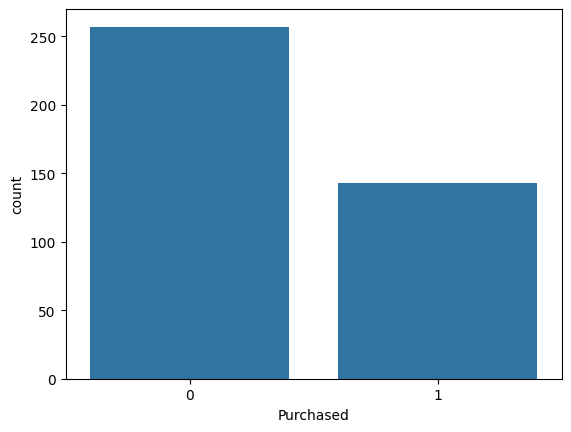

In [292]:
sns.countplot(x=df.Purchased)
plt.show()

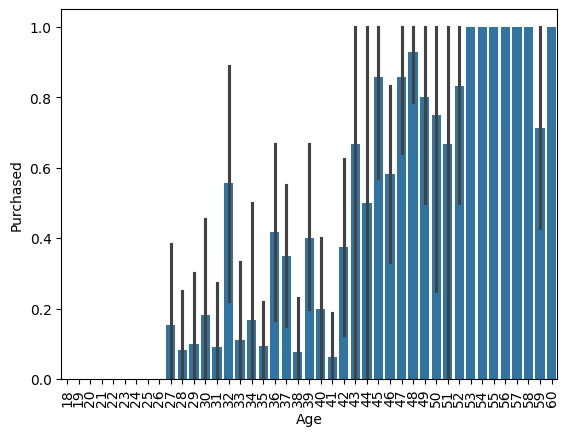

In [293]:
import seaborn as sns
sns.barplot(x=df.Age,y=df.Purchased)
plt.xticks(rotation=90)
plt.show()

In [294]:
X = df.iloc[: , 2:4].values
y=df.iloc[: , -1].values

In [295]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [296]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [297]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
criterion="entropy"
,max_depth=3

)
classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [298]:
y_pred=classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [299]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 2 30]]


0.94

In [300]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



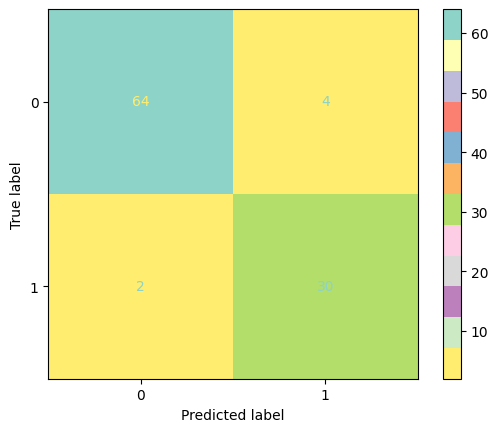

In [301]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap='Set3_r')
plt.show()

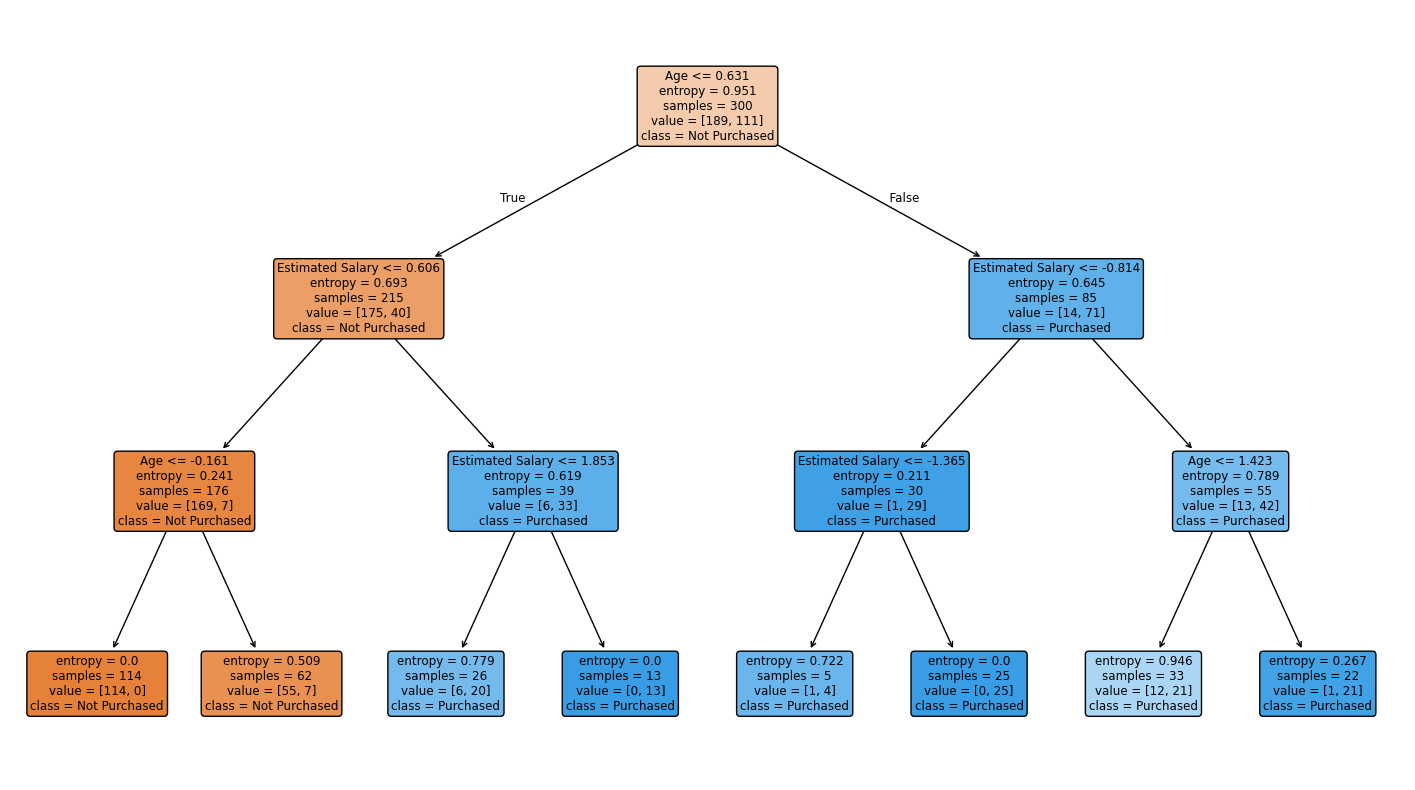

In [302]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(
classifier,
feature_names=["Age", "Estimated Salary"],
class_names=["Not Purchased", "Purchased"],
filled=True,
rounded=True
)
plt.show()

#Using Titanic passenger data, our goal is to predict whether a passenger survived or not based on their detailg.

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [304]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [305]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [306]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [307]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [308]:
df = df[["survived", "pclass", "sex", "age", "fare", "embarked"]]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [309]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [310]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [311]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,0


In [312]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

In [313]:
x=df.drop('survived',axis=1)
y=df['survived']

In [314]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [315]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
criterion="gini"
,max_depth=4
,random_state=0
)
classifier.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [316]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[99 11]
 [22 47]]


0.8156424581005587

In [317]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



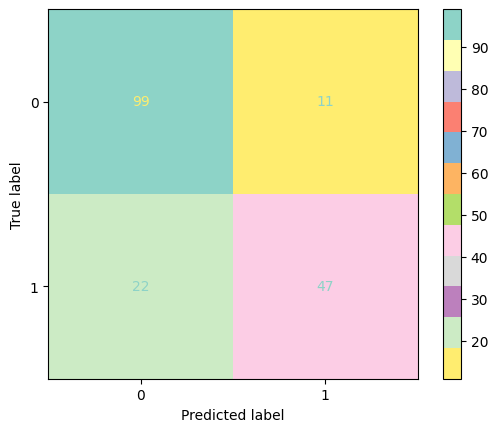

In [318]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    cmap='Set3_r')
plt.show()

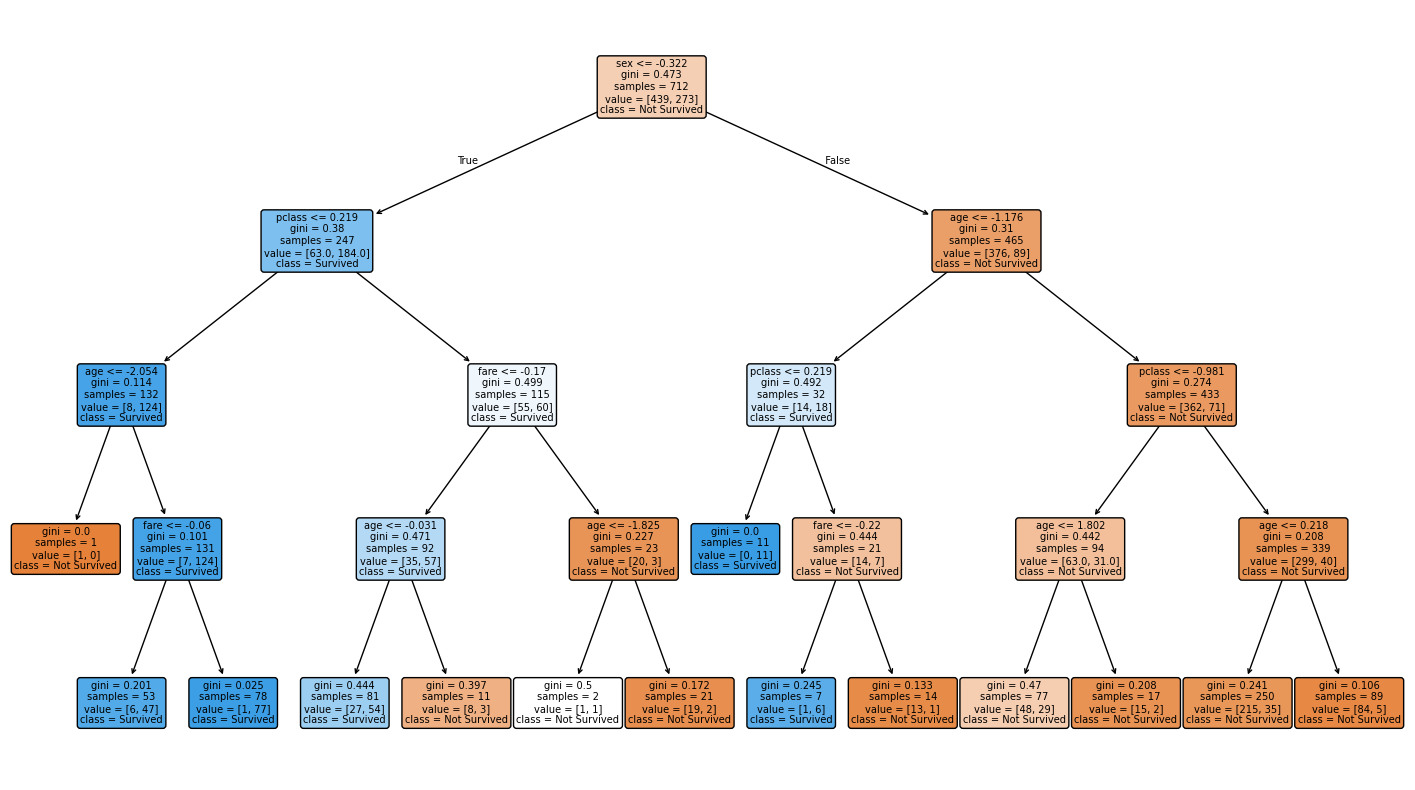

In [319]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(
classifier,
feature_names=["pclass", "sex", "age", "fare", "embarked"],
class_names=["Not Survived", "Survived"],
filled=True,
rounded=True
)
plt.show()

In [320]:
new_passenger = pd.DataFrame([[1, 1, 40, 85, 2]], columns=x.columns)

prediction = classifier.predict(new_passenger.values)

if prediction[0] == 0:
    print("The passenger will not survive.")
else:
    print("The passenger will survive.")

The passenger will not survive.


#Business Scenario


A retail bank runs marketing campaigns to sell term deposit plans to customers.


Calling every customer is expensive and inefficient.


The bank wants a rule-based

In [344]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_marketing_dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [346]:
df=df[["age","job","balance","loan","contact","deposit"]]
df.head()

,age,job,balance,loan,contact,deposit
0,59,admin.,2343,no,unknown,yes
1,56,admin.,45,no,unknown,yes
2,41,technician,1270,no,unknown,yes
3,55,services,2476,no,unknown,yes
4,54,admin.,184,no,unknown,yes


In [347]:
df.contact.value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


In [348]:
df.job.value_counts()

,count
job,
management,2566
blue-collar,1944
technician,1823
admin.,1334
services,923
retired,778
self-employed,405
student,360
unemployed,357


In [349]:
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [350]:
df.loan.value_counts()


,count
loan,
no,9702
yes,1460


In [351]:
df.deposit.value_counts()

,count
deposit,
no,5873
yes,5289


In [352]:
df=pd.get_dummies(df,columns=['job'],drop_first=True)

In [353]:
df=pd.get_dummies(df,columns=['contact'],drop_first=True)

In [354]:
df.head()

,age,balance,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown
0,59,2343,no,yes,False,False,False,False,False,False,False,False,False,False,False,False,True
1,56,45,no,yes,False,False,False,False,False,False,False,False,False,False,False,False,True
2,41,1270,no,yes,False,False,False,False,False,False,False,False,True,False,False,False,True
3,55,2476,no,yes,False,False,False,False,False,False,True,False,False,False,False,False,True
4,54,184,no,yes,False,False,False,False,False,False,False,False,False,False,False,False,True


In [355]:
le=LabelEncoder()
df['loan']=le.fit_transform(df['loan'])
df['deposit']=le.fit_transform(df['deposit'])

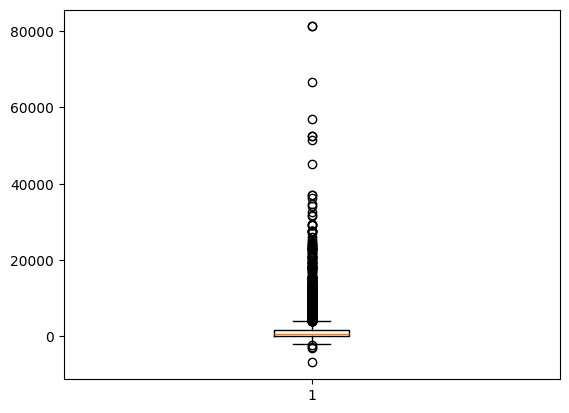

In [356]:
plt.boxplot(df['balance'])
plt.show()

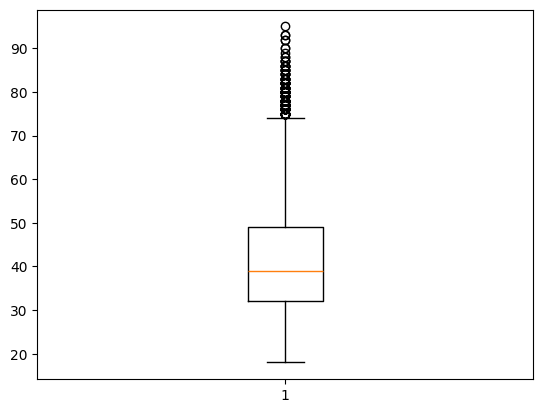

In [334]:
plt.boxplot(df['age'])
plt.show()

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                11162 non-null  int64
 1   balance            11162 non-null  int64
 2   loan               11162 non-null  int64
 3   deposit            11162 non-null  int64
 4   job_blue-collar    11162 non-null  bool 
 5   job_entrepreneur   11162 non-null  bool 
 6   job_housemaid      11162 non-null  bool 
 7   job_management     11162 non-null  bool 
 8   job_retired        11162 non-null  bool 
 9   job_self-employed  11162 non-null  bool 
 10  job_services       11162 non-null  bool 
 11  job_student        11162 non-null  bool 
 12  job_technician     11162 non-null  bool 
 13  job_unemployed     11162 non-null  bool 
 14  job_unknown        11162 non-null  bool 
 15  contact_telephone  11162 non-null  bool 
 16  contact_unknown    11162 non-null  bool 
dtypes: bool(13),

In [357]:
x=df.drop('deposit',axis=1)
y=df['deposit']

In [358]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [359]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [360]:
classifier = DecisionTreeClassifier(
max_depth=4,
  min_samples_split=50,
  min_samples_leaf=20,
  class_weight='balanced',
  random_state=42
)
classifier.fit(x_train , y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [362]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.6574115539632781

In [363]:
confusion_matrix(y_test,y_pred)

array([[743, 423],
       [342, 725]])

In [364]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.68      0.64      0.66      1166\n           1       0.63      0.68      0.65      1067\n\n    accuracy                           0.66      2233\n   macro avg       0.66      0.66      0.66      2233\nweighted avg       0.66      0.66      0.66      2233\n'

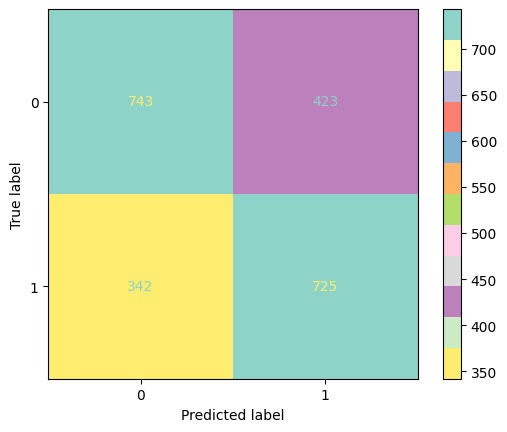

In [365]:
ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    cmap='Set3_r')
plt.show()

In [366]:
y.value_counts(normalize=True)


,proportion
deposit,
0,0.52616
1,0.47384


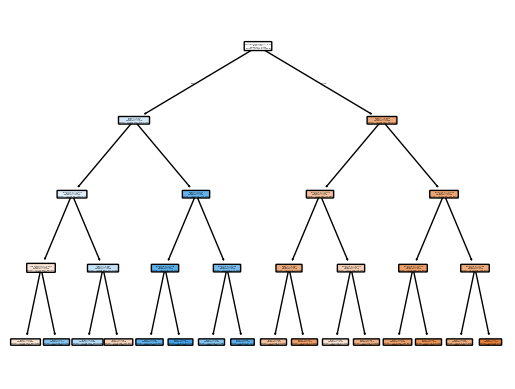

In [367]:
plot_tree(
classifier,
feature_names=x.columns,
class_names=["No", "Yes"],
filled=True,
rounded=True
)
plt.show()